# Case Study: Cyclistic Bike-sharing 
*Leon Le*

*March 6th, 2024*

## Introduction

This is the capstone project portion for the *Google Data Analytics Professional Certificate*. The purpose of this case study is to showcase the analytical skills I have gained through this certification. In this case study I will go through the steps of the data analysis process, and analyze a dataset from Cyclistic, a bike-share company in Chicago. I will use my analysis to identify trends and provide recommendations to improve marketing strategies for Cyclistic. 

## Data Analysis Process
There are six steps that go into the data analysis phase: 
1. Ask
2. Prepare
3. Process
4. Analyze 
5. Share
6. Act

In this case study, I will demonstrate each of these steps in order to solve the business task at hand. 

## 1. Ask
### Business Task: 
Cyclistic is a bike-sharing program that launched more than 5,800 bicycles and 600 docking stations in 2016 all across Chicago. Until now, their marketing strategy relied on building awareness and appealing to broad consumer segments by having flexibility on its pricing plans: 
* single-ride passes (casual rider)
* full-day passes (casual rider)
* annual memberships (Cyclistic member)

Cyclistic's team is aware that maximizing the number of annual members will be the key to future growth. Therefore, the Cyclistic marketing analytics team wants us to analyze and find trends in their trip data. The goal of this analysis is to create a marketing strategy to maximize the number of annual memberships. We will compare differences between casual riders and annual members, and create a marketing strategy to convert casual riders to annual members. We will present our findings to the stakeholders, the Cyclistic executive and marketing team, and they will decide whether to approve the recommended marketing program. 

Main questions we will ask to achieve this goal are:
* How do casual riders and clyclistic members differ? 
* Why would casual riders buy a membership? 
* How can Cyclistic use digital media to influence casual riders to become members?

## 2. Prepare
For this analysis, I will be using R to prepare and process the data for analysis. The Cyclistic trip data from the last 12 months, May 2023 - April 2024, has been made available for us to use. Each csv formatted data set is for a period of one month that logs how different customers types are using Cyclystic services. This data has been made publicly available by Motivate International Inc. under this [license](https://divvybikes.com/data-license-agreement). We will prepare and process all necessary data so it will be ready for our analysis. Once that is done, the datasets will provide us with all the necessary information we need in order to solve our business task at hand: Creating a marketing strategy to maximize the numbers of annual memberships.

In [1]:
library(tidyverse) #for data manipulation, exploration, and visualization
library(lubridate) #working with dates
library(janitor) #clean data
library(dplyr) #data manipulation
library(ggplot2) #visuals
library(scales)
getwd()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




[1] "/kaggle/working"

In [2]:
#importing previous 12 months of Cyclistic trip data
dataMay23 <- read.csv("/kaggle/input/cyclistictripsdataset/202305-divvy-tripdata.csv")
dataJun23 <- read.csv("/kaggle/input/cyclistictripsdataset/202306-divvy-tripdata.csv")
dataJul23 <- read.csv("/kaggle/input/cyclistictripsdataset/202307-divvy-tripdata.csv")
dataAug23 <- read.csv("/kaggle/input/cyclistictripsdataset/202308-divvy-tripdata.csv")
dataSept23 <- read.csv("/kaggle/input/cyclistictripsdataset/202309-divvy-tripdata.csv")
dataOct23 <- read.csv("/kaggle/input/cyclistictripsdataset/202310-divvy-tripdata.csv")
dataNov23 <- read.csv("/kaggle/input/cyclistictripsdataset/202311-divvy-tripdata.csv")
dataDec23 <- read.csv("/kaggle/input/cyclistictripsdataset/202312-divvy-tripdata.csv")
dataJan24 <- read.csv("/kaggle/input/cyclistictripsdataset/202401-divvy-tripdata.csv")
dataFeb24 <- read.csv("/kaggle/input/cyclistictripsdataset/202402-divvy-tripdata.csv")
dataMar24 <- read.csv("/kaggle/input/cyclistictripsdataset/202403-divvy-tripdata.csv")
dataApr24 <- read.csv("/kaggle/input/cyclistictripsdataset/202404-divvy-tripdata.csv")

## 3. Process
First, let's combine all of our data into one big dataset and ensure that all data is in one spot. Next, there are a few columns that we will be using for our analysis like the station IDs and their longitudes and latitudes. 

In [3]:
#combining all data into one dataset
allRawData <- rbind(dataMay23, dataJun23, dataJul23, dataAug23, dataSept23, dataOct23, dataNov23, dataDec23, dataJan24, dataFeb24, dataMar24, dataApr24)


In [4]:
#making sure that the datasets have combined correctly (checking that there is data for all 12 months)
View(allRawData) 


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0D9FA920C3062031,electric_bike,2023-05-07 19:53:48,2023-05-07 19:58:32,Southport Ave & Belmont Ave,13229,,,41.93941,-87.66383,41.93000,-87.65000,member
92485E5FB5888ACD,electric_bike,2023-05-06 18:54:08,2023-05-06 19:03:35,Southport Ave & Belmont Ave,13229,,,41.93948,-87.66385,41.94000,-87.69000,member
FB144B3FC8300187,electric_bike,2023-05-21 00:40:21,2023-05-21 00:44:36,Halsted St & 21st St,13162,,,41.85379,-87.64672,41.86000,-87.65000,member
DDEB93BC2CE9AA77,classic_bike,2023-05-10 16:47:01,2023-05-10 16:59:52,Carpenter St & Huron St,13196,Damen Ave & Cortland St,13133,41.89456,-87.65345,41.91598,-87.67733,member
C07B70172FC92F59,classic_bike,2023-05-09 18:30:34,2023-05-09 18:39:28,Southport Ave & Clark St,TA1308000047,Southport Ave & Belmont Ave,13229,41.95708,-87.66420,41.93948,-87.66375,member
2BA66385DF8F815A,classic_bike,2023-05-30 15:01:21,2023-05-30 15:17:00,Clinton St & Madison St,TA1305000032,McClurg Ct & Ohio St,TA1306000029,41.88275,-87.64119,41.89259,-87.61729,member
31EFCCB05F12D8EF,docked_bike,2023-05-09 14:13:40,2023-05-09 14:47:20,DuSable Lake Shore Dr & Monroe St,13300,Adler Planetarium,13431,41.88096,-87.61674,41.86610,-87.60727,casual
71DFF834E1D3CE0B,classic_bike,2023-05-06 16:47:22,2023-05-06 16:52:13,Shore Dr & 55th St,TA1308000009,Harper Ave & 59th St,KA1503000070,41.79521,-87.58071,41.78794,-87.58832,member
2117485899B4CEA4,classic_bike,2023-05-15 12:47:26,2023-05-15 13:00:05,Clark St & Schiller St,TA1309000024,Franklin St & Lake St,TA1307000111,41.90799,-87.63150,41.88584,-87.63550,member


In [5]:
#Removing unnessessary columns and any duplicates
allRawData <- select(allRawData, -c(start_station_id, end_station_id, start_lat, start_lng, end_lat, end_lng))
allData <- allRawData[!duplicated(allRawData$ride_id),]
print(paste(nrow(allRawData) - nrow(allData), "rows removed"))

[1] "0 rows removed"


In [6]:
#reviewing new dataset
summary(allData)

str(allData)

   ride_id          rideable_type       started_at          ended_at        
 Length:5738612     Length:5738612     Length:5738612     Length:5738612    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 start_station_name end_station_name   member_casual     
 Length:5738612     Length:5738612     Length:5738612    
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  

'data.frame':	5738612 obs. of  7 variables:
 $ ride_id           : chr  "0D9FA920C3062031" "92485E5FB5888ACD" "FB144B3FC8300187" "DDEB93BC2CE9AA77" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "classic_bike" ...
 $ started_at        : chr  "2023-05-07 19:53:48" "2023-05-06 18:54:08" "2023-05-21 00:40:21" "2023-05-10 16:47:01" ...
 $ ended_at          : chr  "2023-05-07 19:58:32" "2023-05-06 19:03:35" "2023-05-21 00:44:36" "2023-05-10 16:59:52" ...
 $ start_station_name: chr  "Southport Ave & Belmont Ave" "Southport Ave & Belmont Ave" "Halsted St & 21st St" "Carpenter St & Huron St" ...
 $ end_station_name  : chr  "" "" "" "Damen Ave & Cortland St" ...
 $ member_casual     : chr  "member" "member" "member" "member" ...


From this overview, we can tell that there have been a total of 5,738,612 rides in the last 12 months, and that all data is stored as character variables. However, there are some rows in the dataset that have no values which wwe also have to take into consideration. There might be a reason for these blank cells, but for this case study we will assume that this was not intentional and that they need to be removed. 

In [7]:
#parsing datetime
allData$started_at <- as.POSIXct(allData$started_at, "%Y-%m-%d %H:%M:%S")
allData$ended_at <- as.POSIXct(allData$ended_at, "%Y-%m-%d %H:%M:%S")


#create new columns to access data variables to manipulate
#all variables including dates are stored as chars right now
#the the dataset format is yyy-mm-dd hh-mm-ss right now
allData$date <- as.Date(allData$started_at)
#can strip the month, day, and year using the format function
allData$month <- format(allData$date, "%m")
allData$day <- format(allData$date, "%d")
allData$year <- format(allData$date, "%Y")
allData$day_of_week <- format(allData$date, "%A")
allData$hour <- hour(allData$started_at) #able to do this through the lubridate function

#parsing datetime
#allData$started_at <- as.POSIXct(allData$started_at, "%Y-%m-%d %H:%M:%S")
#allData$ended_at <- as.POSIXct(allData$ended_at, "%Y-%m-%d %H:%M:%S")

allDataClean <- allData[(!allData$start_station_name == "" & !allData$end_station_name == ""),]#took out all the rows that don't have a start and end location 
#calculate ride lengths and see if there are any zeros or lower
allDataClean$trip_length <- as.numeric((allDataClean$ended_at - allDataClean$started_at) / 60)
allDataClean <- subset(allDataClean, allDataClean$trip_length > 0) #removed the rows where trip_length was less than or equal to 0.


In [8]:
print(paste(nrow(allData) - nrow(allDataClean), "rows were removed."))
summary(allDataClean) #we removed 1,401,693 rows of data that could have thrown the analysis off
View(allDataClean) #What is left is our fully cleaned dataset to use for analysis

[1] "1403309 rows were removed."


   ride_id          rideable_type        started_at                 
 Length:4335303     Length:4335303     Min.   :2023-05-01 00:00:33  
 Class :character   Class :character   1st Qu.:2023-07-06 17:13:21  
 Mode  :character   Mode  :character   Median :2023-09-01 16:26:37  
                                       Mean   :2023-09-23 13:00:12  
                                       3rd Qu.:2023-11-16 22:25:31  
                                       Max.   :2024-04-30 23:58:22  
    ended_at                   start_station_name end_station_name  
 Min.   :2023-05-01 00:04:28   Length:4335303     Length:4335303    
 1st Qu.:2023-07-06 17:28:20   Class :character   Class :character  
 Median :2023-09-01 16:43:38   Mode  :character   Mode  :character  
 Mean   :2023-09-23 13:16:26                                        
 3rd Qu.:2023-11-16 22:38:52                                        
 Max.   :2024-05-01 16:54:05                                        
 member_casual           date     

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,date,month,day,year,day_of_week,hour,trip_length
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
4,DDEB93BC2CE9AA77,classic_bike,2023-05-10 16:47:01,2023-05-10 16:59:52,Carpenter St & Huron St,Damen Ave & Cortland St,member,2023-05-10,05,10,2023,Wednesday,16,12.850000
5,C07B70172FC92F59,classic_bike,2023-05-09 18:30:34,2023-05-09 18:39:28,Southport Ave & Clark St,Southport Ave & Belmont Ave,member,2023-05-09,05,09,2023,Tuesday,18,8.900000
6,2BA66385DF8F815A,classic_bike,2023-05-30 15:01:21,2023-05-30 15:17:00,Clinton St & Madison St,McClurg Ct & Ohio St,member,2023-05-30,05,30,2023,Tuesday,15,15.650000
7,31EFCCB05F12D8EF,docked_bike,2023-05-09 14:13:40,2023-05-09 14:47:20,DuSable Lake Shore Dr & Monroe St,Adler Planetarium,casual,2023-05-09,05,09,2023,Tuesday,14,33.666667
8,71DFF834E1D3CE0B,classic_bike,2023-05-06 16:47:22,2023-05-06 16:52:13,Shore Dr & 55th St,Harper Ave & 59th St,member,2023-05-06,05,06,2023,Saturday,16,4.850000
9,2117485899B4CEA4,classic_bike,2023-05-15 12:47:26,2023-05-15 13:00:05,Clark St & Schiller St,Franklin St & Lake St,member,2023-05-15,05,15,2023,Monday,12,12.650000
10,811149F69AAE82DD,electric_bike,2023-05-19 05:44:26,2023-05-19 05:47:24,Clinton St & Madison St,Kingsbury St & Kinzie St,member,2023-05-19,05,19,2023,Friday,5,2.966667
11,D71F8A3BB45BDA05,classic_bike,2023-05-13 17:37:12,2023-05-13 17:43:27,Clinton St & Madison St,Kingsbury St & Kinzie St,member,2023-05-13,05,13,2023,Saturday,17,6.250000
12,B0E352E3CE2B6EE9,classic_bike,2023-05-05 06:28:09,2023-05-05 06:55:51,Clark St & Schiller St,Michigan Ave & 8th St,member,2023-05-05,05,05,2023,Friday,6,27.700000


## 4. Analyze
Time to analyze our data and gain some insights about it! We will compare how "Casual" and "Annual" members use the bike-sharing program differently and identify trends and relationships: 


### Percentage of Casual Members vs. Annual Members



In [9]:
allDataClean %>%
    group_by(member_casual) %>%
    summarise(count = length(ride_id),
             '%' = (length(ride_id) / nrow(allDataClean)) * 100)
            

member_casual,count,%
<chr>,<int>,<dbl>
casual,1524550,35.16594
member,2810753,64.83406


### The Mean, Median, Max, and Min of Rides Between Both Memberships Throughout The Year 

In [10]:
newData <- allDataClean %>%
    arrange(desc(trip_length))
newData

ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,date,month,day,year,day_of_week,hour,trip_length
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
59AD7EE868FC6588,docked_bike,2023-05-30 12:48:08,2023-06-07 23:04:26,Wells St & Polk St,Lincoln Ave & Roscoe St*,casual,2023-05-30,05,30,2023,Tuesday,12,12136.300
FA287922CA358CE0,docked_bike,2023-06-03 17:52:15,2023-06-11 11:44:31,Fort Dearborn Dr & 31st St,Fort Dearborn Dr & 31st St*,casual,2023-06-03,06,03,2023,Saturday,17,11152.267
47158A16C754A9F4,docked_bike,2023-08-10 22:17:49,2023-08-15 17:09:02,Larrabee St & Webster Ave,Michigan Ave & Oak St,casual,2023-08-10,08,10,2023,Thursday,22,6891.217
4031082BC503CC84,docked_bike,2023-08-02 17:28:57,2023-08-06 11:07:57,University Ave & 57th St,Museum of Science and Industry,casual,2023-08-02,08,02,2023,Wednesday,17,5379.000
3BC5FFFDF7503DAA,docked_bike,2023-06-15 13:28:59,2023-06-18 23:12:06,DuSable Lake Shore Dr & Monroe St,Fort Dearborn Dr & 31st St*,casual,2023-06-15,06,15,2023,Thursday,13,4903.117
6786F74C5A6183FB,docked_bike,2023-06-18 19:21:22,2023-06-21 10:59:46,Dusable Harbor,Wentworth Ave & Cermak Rd*,casual,2023-06-18,06,18,2023,Sunday,19,3818.400
D2273A0F45CDD4CC,docked_bike,2023-08-18 09:13:48,2023-08-20 16:14:38,2112 W Peterson Ave,Sheridan Rd & Loyola Ave,casual,2023-08-18,08,18,2023,Friday,9,3300.833
A795B5420E15A65B,docked_bike,2023-05-10 18:42:11,2023-05-13 00:47:58,Clark St & Schiller St,Ashland Ave & Wellington Ave,casual,2023-05-10,05,10,2023,Wednesday,18,3245.783
280CB8109510E280,docked_bike,2023-07-06 21:34:55,2023-07-08 14:32:46,California Ave & North Ave,Damen Ave & Pierce Ave,casual,2023-07-06,07,06,2023,Thursday,21,2457.850


#### The Average Trip Length in Minutes 

In [11]:
aggregateMean <- aggregate(allDataClean$trip_length ~ allDataClean$member_casual, FUN = mean)

aggregateMean

allDataClean$member_casual,allDataClean$trip_length
<chr>,<dbl>
casual,23.33726
member,12.37221


#### The Median value of Trip Length in Minutes 

In [12]:
aggregate(allDataClean$trip_length ~ allDataClean$member_casual, FUN = median)

allDataClean$member_casual,allDataClean$trip_length
<chr>,<dbl>
casual,12.98333
member,8.75000


#### The Longest Trip Duration in Minutes

In [13]:
aggregate(allDataClean$trip_length ~ allDataClean$member_casual, FUN = max)

allDataClean$member_casual,allDataClean$trip_length
<chr>,<dbl>
casual,12136.30
member,1497.65


#### The Shortest Trip Duration in Minutes

In [14]:
aggregate(allDataClean$trip_length ~ allDataClean$member_casual, FUN = min)

allDataClean$member_casual,allDataClean$trip_length
<chr>,<dbl>
casual,0.01666667
member,0.01666667


### Monthly Distribution of Cyclistic Members and Their Percentages Relative to the Membership

In [15]:
#Month
allDataClean %>%
    group_by(year, month) %>%
    summarise(count = length(ride_id),
             '%' = (length(ride_id) / nrow(allDataClean)) * 100,
              'casual member #' = sum(member_casual == "casual"),
             'casual_%' = (sum(member_casual == "casual") / length(ride_id)) * 100,
             'annual member #' = sum(member_casual == "member"),
             'member_%' = (sum(member_casual == "member") / length(ride_id)) * 100)

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,month,count,%,casual member #,casual_%,annual member #,member_%
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
2023,05,463187,10.684074,177025,38.21891,286162,61.78109
2023,06,534729,12.334294,219788,41.10269,314941,58.89731
2023,07,573941,13.238775,245319,42.74290,328622,57.25710
2023,08,584862,13.490683,233860,39.98550,351002,60.01450
2023,09,506555,11.684420,196938,38.87791,309617,61.12209
2023,10,403702,9.311967,130269,32.26860,273433,67.73140
2023,11,274722,6.336858,72061,26.23052,202661,73.76948
2023,12,167118,3.854817,36682,21.94976,130436,78.05024
2024,01,113788,2.624684,17712,15.56579,96076,84.43421


### Weekly Distribution of Cyclistic Members and Their Percentages Relative to the Membership

In [16]:
#Checking to see which week day is the most popular in each membership
allDataClean$day_of_week <- ordered(allDataClean$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")) #make sure that the week days are in the right order (when grouping)
allDataClean %>%
    mutate(day_of_week = wday(started_at, label = TRUE)) %>%
    group_by(member_casual, day_of_week) %>%
    summarise(rides = n())


allDataClean %>%
    group_by(day_of_week) %>%
    summarise(count = length(ride_id),
             '% of week' = (length(ride_id) / nrow(allDataClean)) * 100,
              'casual member #' = sum(member_casual == "casual"),
             'casual_%' = (sum(member_casual == "casual") / length(ride_id)) * 100,
             'annual member #' = sum(member_casual == "member"),
             'member_%' = (sum(member_casual == "member") / length(ride_id)) * 100)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,day_of_week,rides
<chr>,<ord>,<int>
casual,Sun,259910
casual,Mon,182257
casual,Tue,182268
casual,Wed,175725
casual,Thu,190724
casual,Fri,219819
casual,Sat,313847
member,Sun,307287
member,Mon,402980


day_of_week,count,% of week,casual member #,casual_%,annual member #,member_%
<ord>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
Sunday,567197,13.08321,259910,45.82359,307287,54.17641
Monday,585237,13.49933,182257,31.14243,402980,68.85757
Tuesday,636178,14.67436,182268,28.65047,453910,71.34953
Wednesday,624691,14.40940,175725,28.12991,448966,71.87009
Thursday,643234,14.83712,190724,29.65080,452510,70.34920
Friday,611784,14.11168,219819,35.93082,391965,64.06918
Saturday,666982,15.38490,313847,47.05479,353135,52.94521


### Hourly Distribution Throughout the Day of Cyclistic Members and Their Percentages Relative to the Membership

In [17]:
#Hour
allDataClean %>% 
    group_by(hour) %>%
    summarise(count = length(ride_id),
             '%' = (length(ride_id) / nrow(allDataClean)) * 100,
              'casual member #' = sum(member_casual == "casual"),
             'casual_%' = (sum(member_casual == "casual") / length(ride_id)) * 100,
             'annual member #' = sum(member_casual == "member"),
             'member_%' = (sum(member_casual == "member") / length(ride_id)) * 100)

hour,count,%,casual member #,casual_%,annual member #,member_%
<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
0,47331,1.0917576,24206,51.14196,23125,48.85804
1,28528,0.6580394,15460,54.19237,13068,45.80763
2,15855,0.3657184,8834,55.71744,7021,44.28256
3,9218,0.2126264,4636,50.29291,4582,49.70709
4,9484,0.2187621,3447,36.34542,6037,63.65458
5,34891,0.8048111,8054,23.08332,26837,76.91668
6,106120,2.4478105,21164,19.94346,84956,80.05654
7,197752,4.5614343,38146,19.28982,159606,80.71018
8,249573,5.7567603,52549,21.05556,197024,78.94444


## 5. Share 
Now that the analysis is over, visualizations will be created with the insight that was gained. 

### Percentage of Casual Members vs. Annual Members


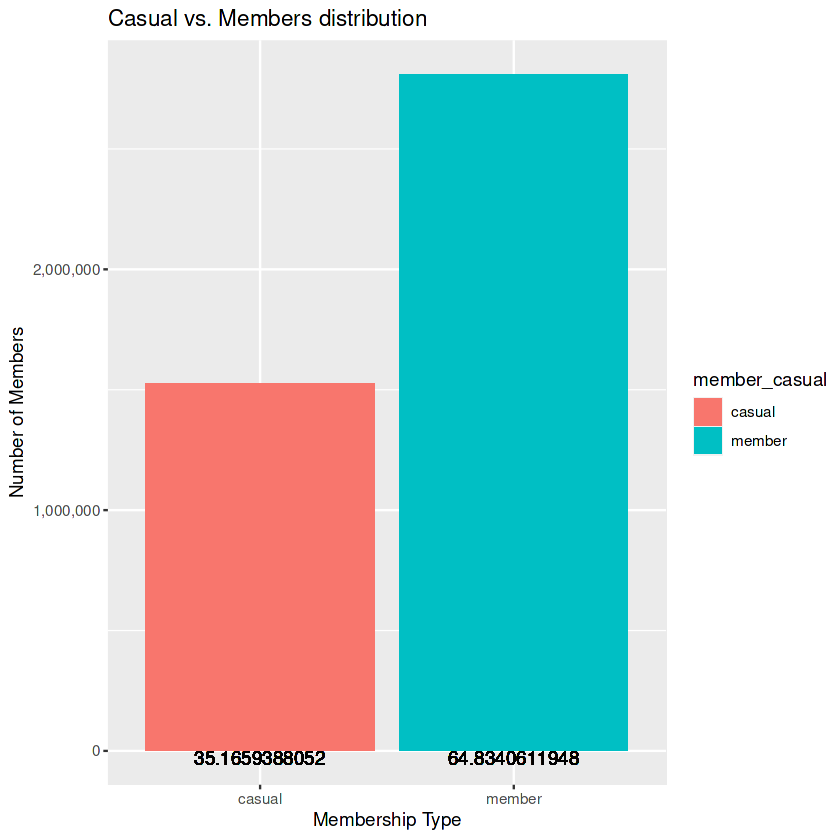

In [18]:
#add to visualization
#Casual Vs. Annual Member
CasualxMember <- ggplot(allDataClean, aes(member_casual, fill=member_casual)) + 
    geom_bar() + 
    geom_text(aes(label=ifelse(member_casual=="casual",(length(which(allDataClean$member_casual == "casual")) / nrow(allDataClean)) * 100, (length(which(allDataClean$member_casual == "member")) / nrow(allDataClean)) * 100 )) ,vjust = 1, y=0) + 
    labs(x = "Membership Type", y = "Number of Members", title= "Casual vs. Members distribution")
              
CasualxMember + scale_y_continuous(labels = label_comma())

#add pie chart?

As we can see in this bar graph, there are more annual members enrolled than casual members throughout the last year. Out of all the riders about 65% are annual members and 35% casual ones, making annual memberships 30% more popular than casual ones. 

### Monthly Distribution of Cyclistic Members Relative to Membership

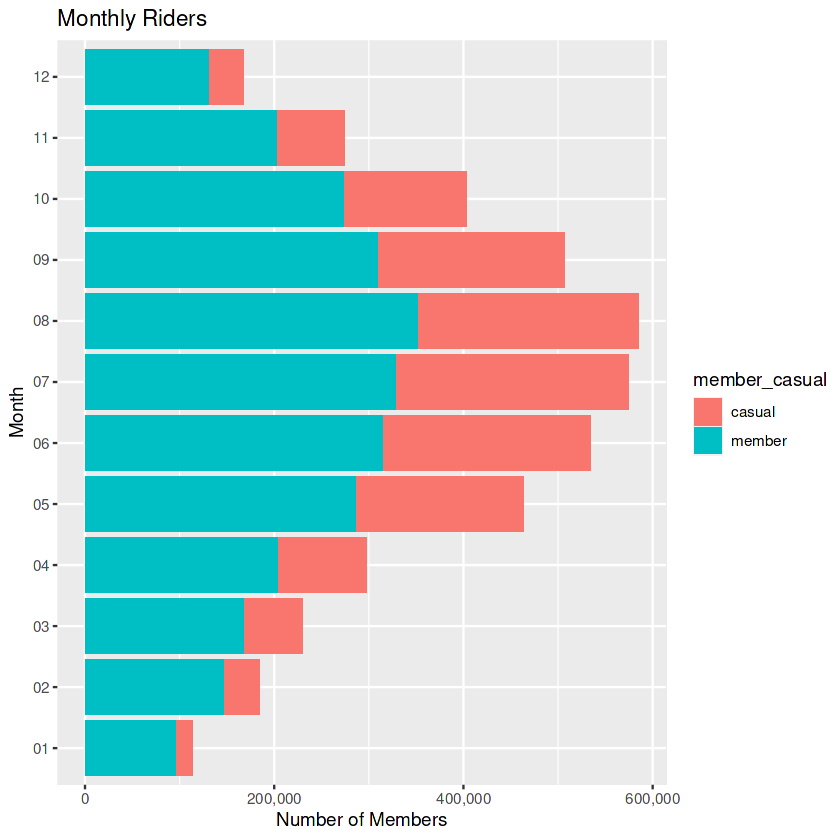

In [19]:
#Monthly
Monthly <- ggplot(allDataClean, aes(month, fill=member_casual)) +
    geom_bar() +
    #geom_text(aes(group=month, label=ifelse(member_casual=="casual",(length(which(allDataClean$member_casual == "casual")) / nrow(allDataClean)) * 100, (length(which(allDataClean$member_casual == "member")) / nrow(allDataClean)) * 100 )) ,vjust = -0.25, position=position_dodge(width=1), inherit.aes=TRUE, hjust=-0.5) +
    labs(x="Month", y="Number of Members", title="Monthly Riders") +
    coord_flip()

Monthly + scale_y_continuous(labels = label_comma())

We can see throughout the last 12 months that the summer time is the most busy for Cyclistic. The months June, July, and August are the most busy months for Cyclistic, August being the most busy and having 13% of riders from the dataset. We can observe that in all months we have more annual members than casual riders and that at the end and beginning of the year (winter season) the numbers in both memberships go down drastically, especially for casual riders. In January specifically we can observe a major upset between casual and annual riders as about 85% of riders is composed of annual members. 

### Average Weekly Distribution of Cyclistic Members Relative to Membership 

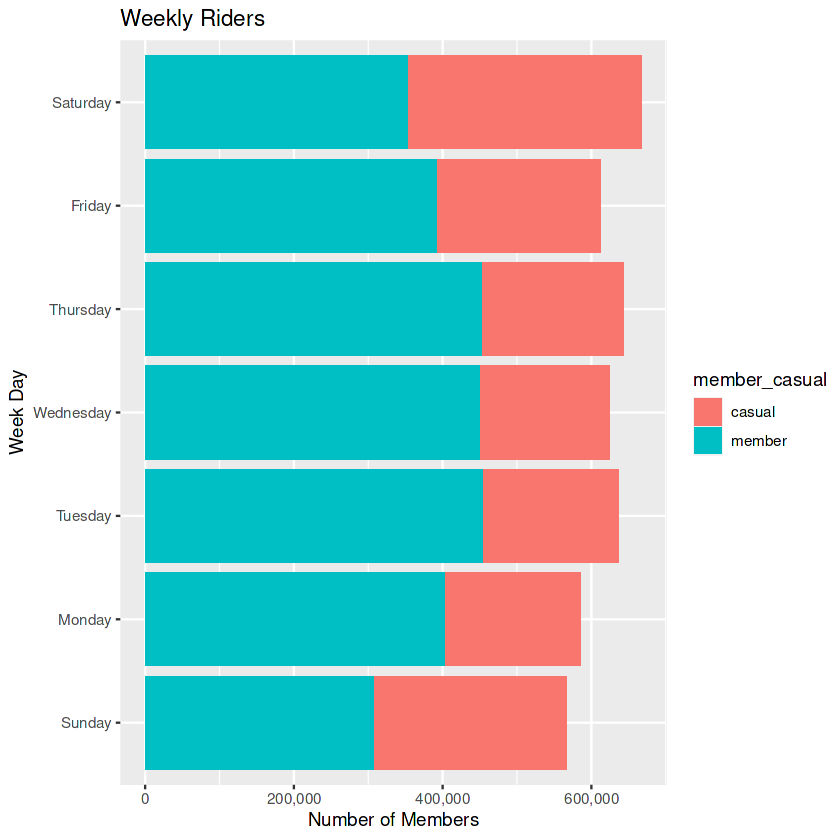

In [20]:
#Weekly
Weekly <- ggplot(allDataClean, aes(day_of_week, fill=member_casual)) +
    geom_bar() +
    labs(x="Week Day", y="Number of Members", title="Weekly Riders") +
    coord_flip()


Weekly + scale_y_continuous(labels = label_comma())



This graph shows us that the days with the most amount of rides are Tuesday, Thursday and Saturday, with Saturday being the day with the most amount of rides. We can observe that throught the week the number of rides is very close to each other regardless of what day it is. For all weekdays the majority of rides are from annual members while on the weekend, the annual riders decline while the casual riders increases to a point where we almost have an equal amount (50/50) of each member type. This tells us that annual riders tend to ride more during the weekdays than on the weekends and casual riders ride more on the weekend than the weekdays. 

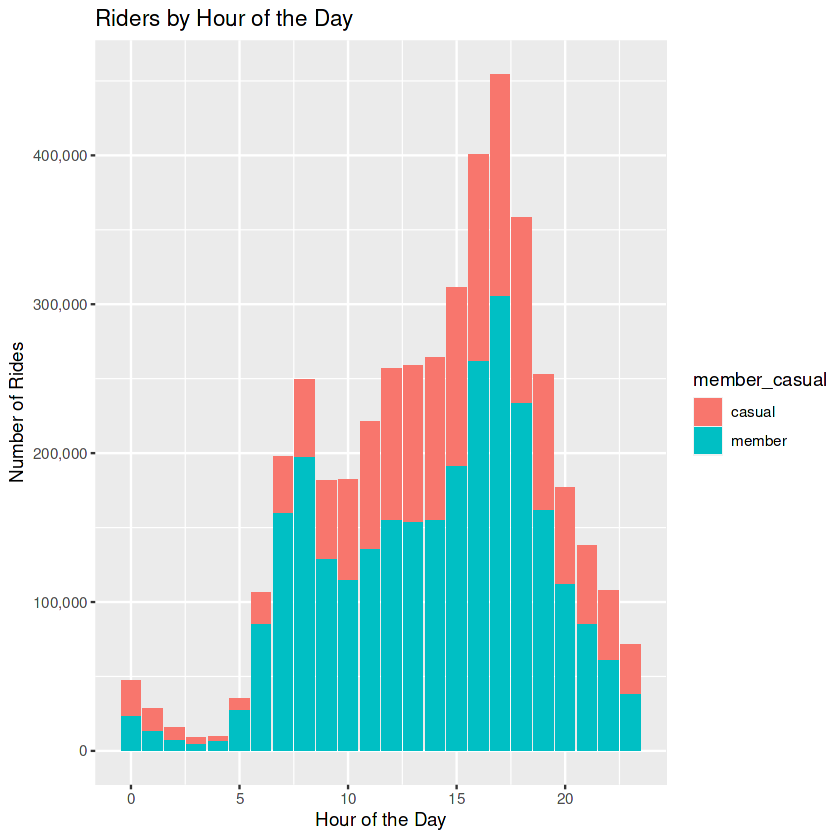

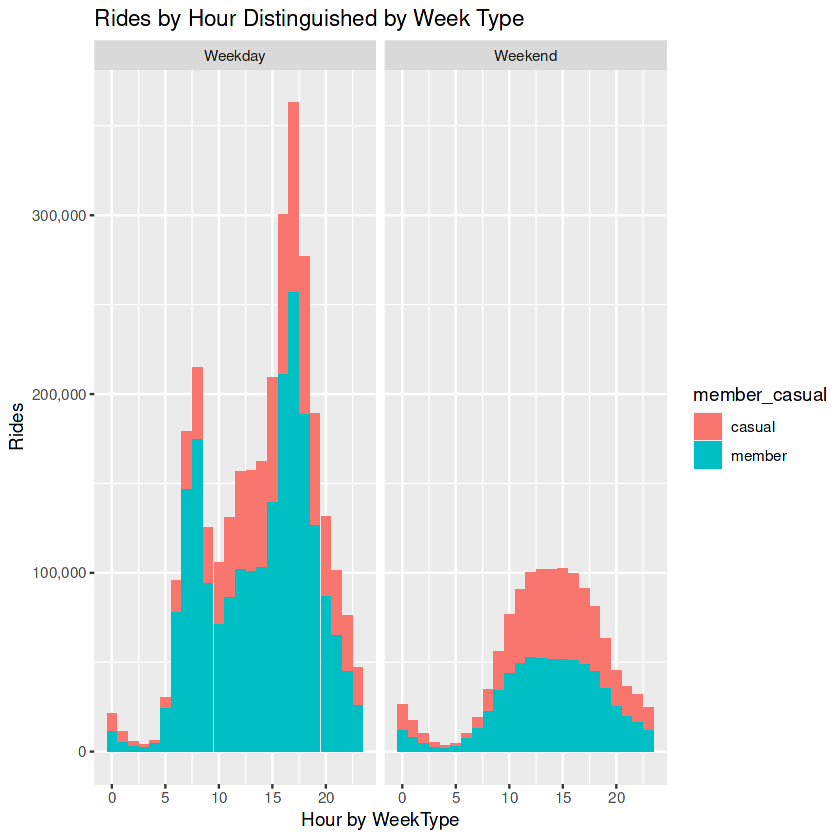

In [21]:
#Hourly

Hourly <- ggplot(allDataClean, aes(hour, fill=member_casual)) +
    geom_bar()+
    labs(x="Hour of the Day", y="Number of Rides", title="Riders by Hour of the Day") 

HourlyByWeekType <-allDataClean %>%
    mutate(weekType = ifelse(day_of_week == 'Saturday' | day_of_week == 'Sunday', 'Weekend', 'Weekday')) %>%
 ggplot(aes(hour, fill=member_casual)) +
    geom_bar() + 
    labs(x="Hour by WeekType", y="Rides", title="Rides by Hour Distinguished by Week Type") + 
    facet_wrap(~ weekType)

Hourly + scale_y_continuous(labels = label_comma()) 

HourlyByWeekType + scale_y_continuous(labels = label_comma()) 

We can observe that the most rides occur during the evening times (4pm - 6pm) with 6pm being the time with the most rides. We have our first offset late at night from 12am - 3am. During those times casual riders have a higher ratio than annual members. 

From the graph that distinguishes by week type, we can observe that weekday have a lot more rides throguhout the day and that casual riders are more likely to ride a bike during the weekends than they are during the weekdays. While annual members dominate the weekdays, it is almost a 50/50 percantage when it comes to the number of casual riders versus annual riders. 

### 6. Act
In this last stage of the project, we will act on our findings. I will present what insights we have gained through our analysis and give recommended suggestions based on the findings and the objective of this project. 

### Key Takeaways
* The average duration for causal riders is 23 minutes while the average trip duration for annual riders is 12 minutes.
* Within the last 12 months, there were a total of 4,335,303 rides. Out of those rides, 1,524,550 of them were causal riders and 2,810,753 were annual riders.
* Cyclistic had 30% more annual members than casual members
* The most amount of rides occur during the summer time. August being the busiest month with 584,862 rides and a 60/40 percent proportion of annual versus casual member ratio.
* The busiest day of rides throughout the week are Tuesday, Thursday, and Saturday. However, for casual riders the weekend has the most amount of rides and a bigger potential for converting member to annual members.
* Throughout the weekday, there is an initial increase in rides in the morning (6am - 9am) which then falls back down but increases immensely back up in the evening time (4pm - 6pm). 
* On the weekends, there is a steady increase that goes from the morning to the afternoon (6am - 3pm) which then steadily decreases as the day goes on.
* We can conclude that annual riders tend to use bikes as a way to commute to work during the week and that on weekends the number of causal riders spikes up a lot as rides are most likely used for recreation.


### Recommendations
1. In order to maximize annual riders, a marketing campaign needs to be specifically focused towards people who commute to work via bike. This can be done by making a bike ride to work/school more appealing. The campaign should focus on this specific target group and mention the amazing benefits that come with communiting to work via bike (avoid traffic, more sustainable to the planet, cheap, etc.). The ads should include showing a person in work clothes of different occupations using Cyclistic to get to work and showhing how simple it is to use. This should be advertised through billboards, handing out flyers to coorporate companies, and social media posts. 
2. Another way to maximize annual members is to convert the casual riders. The main focus would be to make it more appealing to people who only use Cyclistic during the weekends. Creating coupons or discounts so that getting an annual membership would be worth more than getting a casual rider card every weekend would help convert members. Advertising these coupons on the weekends where it gets very busy (parks, museums, trails, city, etc.) would get the attention of a lot of people. Advertising how easily accessible bikes can be not only to travel, but as well as exercise can increase the use of Cyclistic services as it provides a lot more variety than just commuting to work. 
3. The marketing campaign should start advertising in the late winter and early summer as the main and most amount of service is generated in the summer. Thus, a summer-plan should be considered as an option as it shows new members how accessible and easy Cyclistic is to use and would provide them more of an inclination to convert to an annual membership since they are already familiar with the service. 

### Things to Consider 
In this analysis, there was one concern with the data that was provided was that there were a good number of rides that had a trip duration of zero or the trip duration just was not recorded at all. This needs to be further examed to see if it was an error in the system or intential for a specific purpose. This information would have helped the analysis be more accurate. 
For the future, more data about the rider like age and gender would have been useful to potentially be able to target marketing strategies more direct. That would have been very interesting to see! 

### Conclusion
This is my take on the Google Data Analytics Capstone Case Study project. This project has helped me put the data analysis steps and tools I learned through the course into action. With this project, I especially was able to practice the R language and utilize Kaggle to to complete my case study. 
Thank you for your time! 

Leon Le 